# WeatherPy

In [1]:
!pip install citipy

In [6]:
import matplotlib.pyplot as plt
from citipy import citipy as cp
import pandas as pd
import requests as req
import json

In [7]:
#Grab list of cities based on coordinates from citipy
citylist = []
count = 0
dup = 'no'

for x in range(-90,90,1):
    for y in range(-180,180,1):
        city = cp.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
            #Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'

print(len(citylist))

7957


In [4]:
print(citylist[0])

{'city': 'vaini', 'country': 'to', 'lat': -90, 'long': -180}


In [8]:
#Create dataframe. Grab 500 random cities
citypd = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
})

citypd.head()

samplecity = citypd.sample(500)

In [9]:
samplecity

,city,country
7239,ostashkov,ru
1803,garissa,ke
7083,magadan,ru
6748,angermunde,de
3091,kidal,ml
2324,serabu,sl
2754,dakar,sn
6045,tieli,cn
2085,totness,sr
5838,lively,ca


In [10]:
apikey = '2968bbdd3064d71e0090387e37020558'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
count = 0
samplecity['latitude'] = ""
samplecity['longitude'] = ""
samplecity['temperature'] = ""
samplecity['humidity'] = ""
samplecity['cloudiness'] = ""
samplecity['wind_speed'] = ""

for index,row in samplecity.iterrows():
    count+= 1
    query_url = url + "appid=" + apikey + "&units=" + units + "&q=" + row['city']
    try:
        weather_response = req.get(query_url)
        cityweather = weather_response.json()
#         print(cityweather)
        samplecity.set_value(index, "latitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "longitude", int(cityweather['coord']['lat']))
        samplecity.set_value(index, "temperature", int(cityweather['main']['temp']))
        samplecity.set_value(index, "humidity", int(cityweather['main']['humidity']))
        samplecity.set_value(index, "cloudiness", int(cityweather['clouds']['all']))
        samplecity.set_value(index, "wind_speed", int(cityweather['wind']['speed']))
    except:
        print(f"No data for this city: {row['city']}")
    print(f"This is city#: {count}")
    print(f"This is: {row['city']}" )
    print(f"This is the requested URL: {query_url}")

This is city#: 1
This is: ostashkov
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=ostashkov
This is city#: 2
This is: garissa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=garissa
This is city#: 3
This is: magadan
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=magadan
This is city#: 4
This is: angermunde
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=angermunde
This is city#: 5
This is: kidal
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=kidal
This is city#: 6
This is: serabu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e00903

This is city#: 47
This is: jacareacanga
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=jacareacanga
This is city#: 48
This is: tongling
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=tongling
This is city#: 49
This is: kaunas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=kaunas
This is city#: 50
This is: ostrogozhsk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=ostrogozhsk
This is city#: 51
This is: guantanamo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=guantanamo
This is city#: 52
This is: ustyuzhna
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?

This is city#: 93
This is: abramovka
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=abramovka
This is city#: 94
This is: providencia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=providencia
This is city#: 95
This is: filadelfia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=filadelfia
This is city#: 96
This is: xicotencatl
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=xicotencatl
This is city#: 97
This is: new ulm
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=new ulm
No data for this city: bolshaya irba
This is city#: 98
This is: bolshaya irba
This is the requested URL: http

This is city#: 139
This is: pandan niog
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=pandan niog
No data for this city: vaihingen
This is city#: 140
This is: vaihingen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=vaihingen
No data for this city: palabuhanratu
This is city#: 141
This is: palabuhanratu
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=palabuhanratu
This is city#: 142
This is: pawai
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=pawai
This is city#: 143
This is: maridi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=maridi
This is city#: 144
This is: haripur
This i

This is city#: 185
This is: rutigliano
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=rutigliano
This is city#: 186
This is: aguas belas
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=aguas belas
This is city#: 187
This is: bichura
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=bichura
This is city#: 188
This is: thinadhoo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=thinadhoo
This is city#: 189
This is: erzurum
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=erzurum
This is city#: 190
This is: marevo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?app

This is city#: 231
This is: keelung
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=keelung
This is city#: 232
This is: nayagarh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=nayagarh
This is city#: 233
This is: hearst
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=hearst
This is city#: 234
This is: bijar
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=bijar
This is city#: 235
This is: yerofey pavlovich
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=yerofey pavlovich
This is city#: 236
This is: nederland
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?ap

This is city#: 276
This is: baoying
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=baoying
This is city#: 277
This is: jatiroto
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=jatiroto
This is city#: 278
This is: ciudad real
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=ciudad real
This is city#: 279
This is: acarau
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=acarau
This is city#: 280
This is: monrovia
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=monrovia
This is city#: 281
This is: octeville
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=29

This is city#: 322
This is: qazvin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=qazvin
This is city#: 323
This is: dejen
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=dejen
No data for this city: vasilsursk
This is city#: 324
This is: vasilsursk
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=vasilsursk
No data for this city: satitoa
This is city#: 325
This is: satitoa
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=satitoa
This is city#: 326
This is: manuk mangkaw
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=manuk mangkaw
This is city#: 327
This is: mitha tiwana
This is the 

This is city#: 368
This is: jaciara
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=jaciara
This is city#: 369
This is: rengo
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=rengo
This is city#: 370
This is: linqiong
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=linqiong
No data for this city: tall kayf
This is city#: 371
This is: tall kayf
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=tall kayf
No data for this city: fulitun
This is city#: 372
This is: fulitun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=fulitun
This is city#: 373
This is: druskininkai
This is the requested U

This is city#: 413
This is: sao francisco
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=sao francisco
This is city#: 414
This is: armizonskoye
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=armizonskoye
No data for this city: sug-aksy
This is city#: 415
This is: sug-aksy
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=sug-aksy
This is city#: 416
This is: fengrun
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=fengrun
This is city#: 417
This is: xinmin
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=xinmin
This is city#: 418
This is: dauphin
This is the requested URL: http://api.op

This is city#: 459
This is: kolondieba
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=kolondieba
This is city#: 460
This is: seydi
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=seydi
This is city#: 461
This is: qorveh
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=qorveh
This is city#: 462
This is: burns lake
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=burns lake
This is city#: 463
This is: valer
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3064d71e0090387e37020558&units=Imperial&q=valer
This is city#: 464
This is: beitbridge
This is the requested URL: http://api.openweathermap.org/data/2.5/weather?appid=2968bbdd3

In [11]:
samplecity = samplecity[samplecity.latitude != ""]
samplecity

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
7239,ostashkov,ru,57,57,20,87,80,8
1803,garissa,ke,0,0,80,42,0,9
7083,magadan,ru,59,59,-22,74,20,4
6748,angermunde,de,53,53,41,86,90,16
3091,kidal,ml,18,18,61,47,0,8
2324,serabu,sl,7,7,78,80,0,6
2754,dakar,sn,14,14,80,91,0,13
6045,tieli,cn,46,46,-28,44,8,5
2085,totness,sr,5,5,82,94,20,15
5838,lively,ca,46,46,15,85,90,3


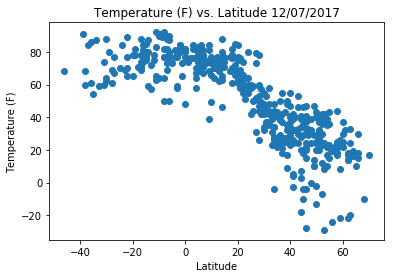

In [12]:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(samplecity['latitude'],samplecity['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

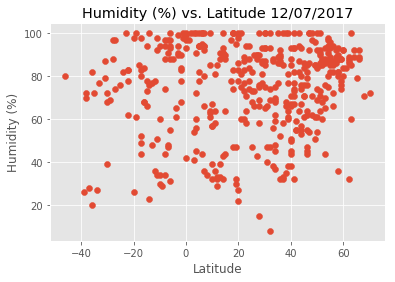

In [13]:
# plt.scatter(latitude,humidity)
plt.scatter(samplecity['latitude'], samplecity['humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

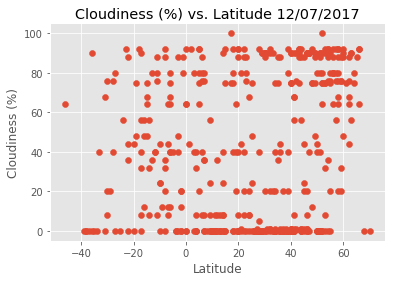

In [14]:
# plt.scatter(latitude,cloudy)
plt.scatter(samplecity['latitude'], samplecity['cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()

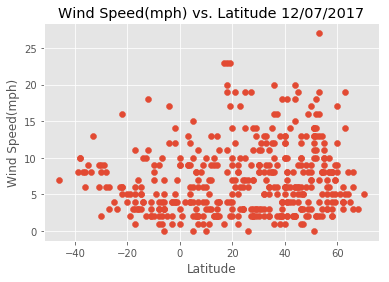

In [16]:
# plt.scatter(latitude,windspeed)
plt.scatter(samplecity['latitude'], samplecity['wind_speed'])
plt.title(f"Wind Speed(mph) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.style.use('ggplot')
plt.savefig("Wind_Speed.png")
plt.show()

In [17]:
# samplecity = samplecity[samplecity.latitude != ""]
#above works to remove blank answers
#Make into CSV
samplecity.to_csv("sampleweather.csv", encoding="utf-8", index=False)
df = pd.read_csv("sampleweather.csv")
df.head()

,city,country,latitude,longitude,temperature,humidity,cloudiness,wind_speed
0,ostashkov,ru,57,57,20,87,80,8
1,garissa,ke,0,0,80,42,0,9
2,magadan,ru,59,59,-22,74,20,4
3,angermunde,de,53,53,41,86,90,16
4,kidal,ml,18,18,61,47,0,8
